# Bay Wheels Usage Patterns 2019
## by Amir Ragab

## Investigation Overview

> Bay Wheels(formerly known as Ford GoBike) is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company. Our goal is to explore the difference in usage patterns between subscribers and customers in 2019.


## Dataset Overview

> The dataset I am using is the combined monthly data in 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe and set the data types
df = pd.read_csv('Bay_Wheels_clean.csv')


df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['user_type'] = df['user_type'].astype('category')

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daycat = pd.api.types.CategoricalDtype(ordered=True, categories=days)
df['start_dayofweek'] = df['start_dayofweek'].astype(daycat)

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=months)
df['start_month'] = df['start_month'].astype(monthcat)

df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235694 entries, 0 to 2235693
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2235694 non-null  int64         
 1   start_time               2235694 non-null  datetime64[ns]
 2   end_time                 2235694 non-null  datetime64[ns]
 3   start_station_id         2235694 non-null  object        
 4   start_station_name       2235694 non-null  object        
 5   start_station_latitude   2235694 non-null  float64       
 6   start_station_longitude  2235694 non-null  float64       
 7   end_station_id           2235694 non-null  object        
 8   end_station_name         2235694 non-null  object        
 9   end_station_latitude     2235694 non-null  float64       
 10  end_station_longitude    2235694 non-null  float64       
 11  bike_id                  2235694 non-null  object        
 12  

##  Monthly usage of different usage types

> As we can see, the majority of users are subscribers, with 82.9%, while customers accounted for 17.1%. The most prominent months were february and march, with october being close.

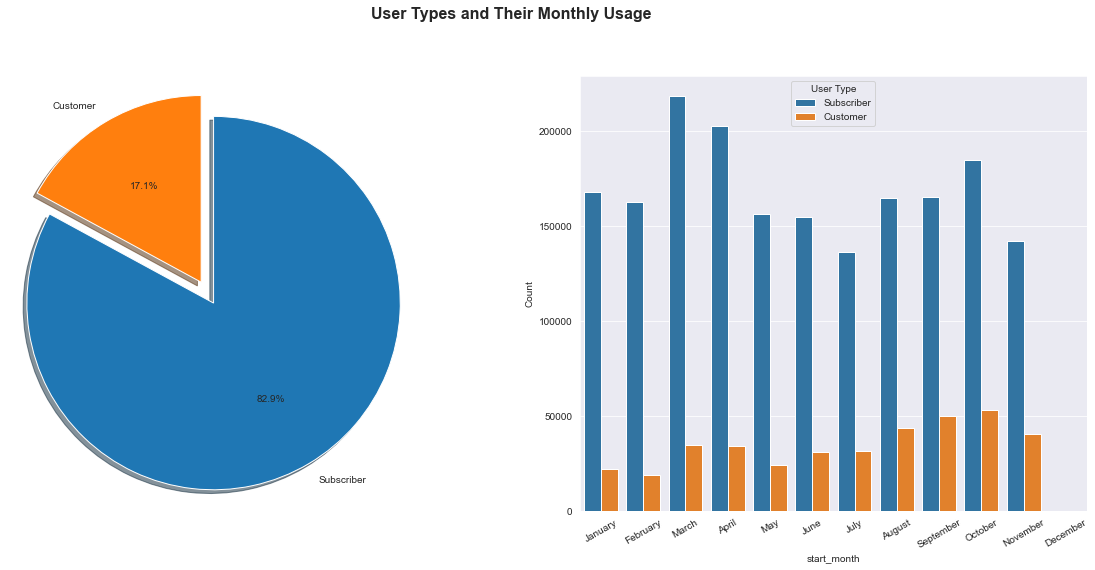

In [16]:
plt.figure(figsize=[20, 8]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');

plt.subplot(1, 2, 1);
sorted_types = df.user_type.value_counts()/df.shape[0];
plt.pie(sorted_types, explode=[0.01, 0.12], labels=sorted_types.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

plt.subplot(1, 2, 2);
ax = sb.countplot(data=df, x='start_month', hue='user_type', hue_order=sorted_types.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.ylabel('Count');
plt.suptitle('User Types and Their Monthly Usage', fontsize=16, fontweight='semibold', y=1);

## Average Weekday Ride Duration

>Customers tend to ride for a longer time, especially during the weekends, while subscribers generally ride for a shorter duration, increasing slightly on weekends.

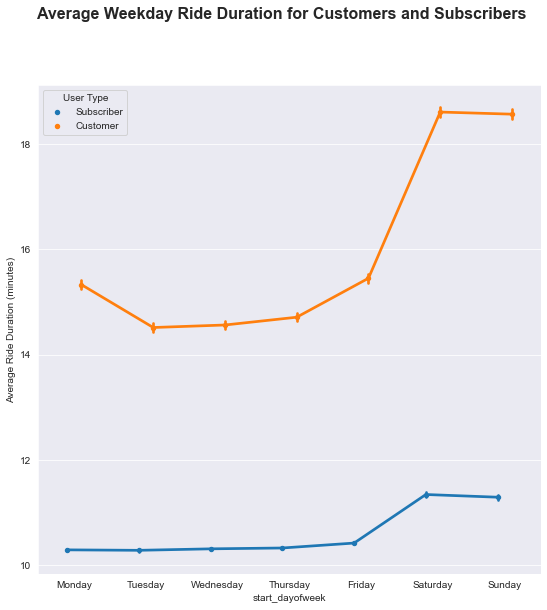

In [30]:
plt.figure(figsize=[9, 9]);
ax = sb.pointplot(data=df, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.2, markers='.', hue_order=sorted_types.index);
ax.legend(title='User Type');
plt.ylabel('Average Ride Duration (minutes)');
plt.suptitle('Average Weekday Ride Duration for Customers and Subscribers', fontsize=16, fontweight='semibold', y=1);

## Hourly Usage during the Week 

> As expected, customers ride bikes for fun and leisurely activities, as they ride them more on weekends and during the afternoon, while subscribers ride bikes more during the rush hours on weekdays, probably as commute.

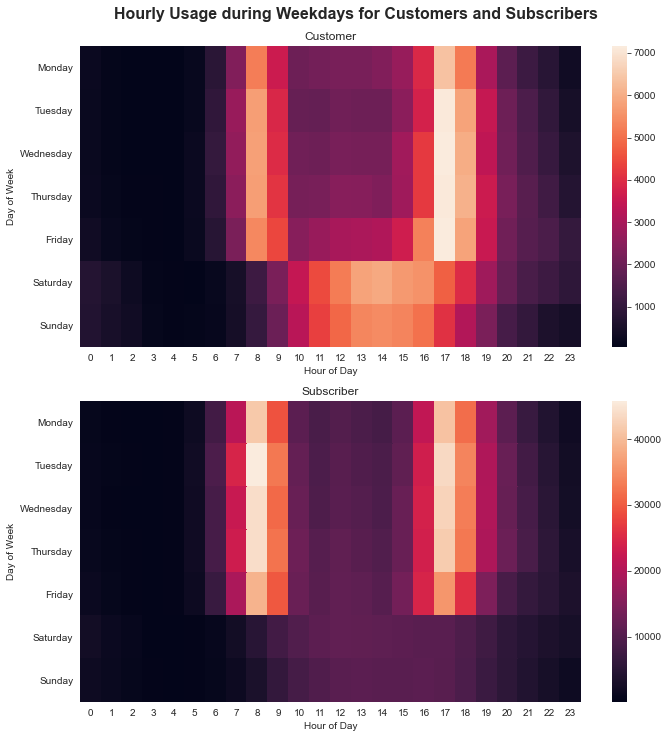

In [23]:
plt.figure(figsize=[10, 10]);

plt.subplot(2, 1, 1)
customer = df.query('user_type == "Customer"')
c_count = customer.groupby(['start_dayofweek', 'start_hour']).size()
c_count = c_count.reset_index(name='count')
c_count = c_count.pivot(index='start_dayofweek', columns='start_hour', values='count')
sb.heatmap(c_count);
plt.title('Customer', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

plt.subplot(2, 1, 2)
subscriber = df.query('user_type == "Subscriber"')
s_count = subscriber.groupby(['start_dayofweek', 'start_hour']).size()
s_count = s_count.reset_index(name='count')
s_count = s_count.pivot(index='start_dayofweek', columns='start_hour', values='count')
sb.heatmap(s_count);
plt.title('Subscriber', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();
plt.suptitle('Hourly Usage during the Week for Customers and Subscribers', fontsize=16, fontweight='semibold', y=1.02);

## Summary

There was a lot more subscribers than customers overall. Both customers and subscribers ride the most during early spring, late summer, and early fall and the least during winter. Different usage patterns and riding habits are observed between the two types of riders: subscribers used the system mostly on work days around rush hours for work commute, whereas customers ride a lot over weekends and in the afternoon for leisure activities. Subscribers tend to have shorter trips compared to customers.

